# Optimization

## Lasso and Ridge Regression Models


**Surrogate Models with Lasso and Ridge Regression**<br>
- Perform a grid search for hyperparameter tuning 
- Test models using both train-test split and the complete dataset
- Compare the performance of the models based on accuracy 

In [ ]:
#surrogate models using both Lasso and Ridge regression.


#Read the csv file and capture data into a pandas dataframe
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree



df = pd.read_csv("steel_strength.csv")
df.head()

formula     c    mn    si     cr  \
0  Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110N...  0.02  0.05  0.05   0.01   
1  Fe0.623C0.00854Mn0.000104Si0.000203Cr0.147Ni0....  0.18  0.01  0.01  13.44   
2  Fe0.625Mn0.000102Si0.000200Cr0.0936Ni0.129Mo0....  0.00  0.01  0.01   8.67   
3  Fe0.634C0.000478Mn0.000523Si0.00102Cr0.000111N...  0.01  0.05  0.05   0.01   
4  Fe0.636C0.000474Mn0.000518Si0.00101Cr0.000109N...  0.01  0.05  0.05   0.01   

      ni    mo     v     n    nb     co     w    al    ti  yield strength  \
0  19.70  2.95  0.01  0.00  0.01  15.00  0.00  0.15  1.55          2411.5   
1   0.01  3.01  0.46  0.04  0.01  19.46  2.35  0.04  0.00          1123.1   
2  13.45  0.82  0.01  0.00  0.01  13.90  0.00  0.39  0.57          1736.3   
3  17.70  3.95  0.01  0.00  0.01  15.00  0.00  0.13  1.47          2487.3   
4  19.40  1.45  0.01  0.00  0.01  14.90  0.00  0.13  1.55          2249.6   

   tensile strength  elongation  
0            2473.5         7.0  
1            1929.2         8.0  
2            1871.8         NaN  
3            2514.9         9.0  
4            2315.0         8.5

In [2]:
df.isna().sum() #EDA


formula             0
c                   0
mn                  0
si                  0
cr                  0
ni                  0
mo                  0
v                   0
n                   0
nb                  0
co                  0
w                   0
al                  0
ti                  0
yield strength      0
tensile strength    0
elongation          9
dtype: int64

In [3]:
df.describe().T 

count         mean         std      min       25%       50%  \
c                 312.0     0.096442    0.109008     0.00     0.010     0.030   
mn                312.0     0.146250    0.397102     0.01     0.010     0.010   
si                312.0     0.221218    0.580796     0.01     0.010     0.010   
cr                312.0     8.043830    5.426169     0.01     3.100     9.050   
ni                312.0     8.184006    6.337055     0.01     0.960     8.500   
mo                312.0     2.766090    1.832908     0.02     1.500     2.210   
v                 312.0     0.183750    0.452462     0.00     0.010     0.010   
n                 312.0     0.005545    0.018331     0.00     0.000     0.000   
nb                312.0     0.035449    0.161537     0.00     0.010     0.010   
co                312.0     7.008782    6.254431     0.01     0.010     7.085   
w                 312.0     0.161282    0.920211     0.00     0.000     0.000   
al                312.0     0.239135    0.340110     0.01     0.030     0.050   
ti                312.0     0.310897    0.556593     0.00     0.000     0.030   
yield strength    312.0  1420.998397  301.894169  1005.90  1219.475  1344.200   
tensile strength  312.0  1641.653205  346.475179  1019.00  1338.125  1666.300   
elongation        303.0    14.007261    5.095974     2.00    10.800    14.800   

                        75%      max  
c                    0.1825     0.43  
mn                   0.0800     3.00  
si                   0.1100     4.75  
cr                  12.5200    17.50  
ni                  12.1175    21.00  
mo                   4.0900     9.67  
v                    0.1275     4.32  
n                    0.0000     0.15  
nb                   0.0100     2.50  
co                  13.4800    20.10  
w                    0.0000     9.18  
al                   0.3000     1.80  
ti                   0.2325     2.50  
yield strength    1576.0750  2510.30  
tensile strength  1899.9500  2570.00  
elongation          17.3000    35.00

array([[<Axes: title={'center': 'c'}>, <Axes: title={'center': 'mn'}>,
        <Axes: title={'center': 'si'}>, <Axes: title={'center': 'cr'}>],
       [<Axes: title={'center': 'ni'}>, <Axes: title={'center': 'mo'}>,
        <Axes: title={'center': 'v'}>, <Axes: title={'center': 'n'}>],
       [<Axes: title={'center': 'nb'}>, <Axes: title={'center': 'co'}>,
        <Axes: title={'center': 'w'}>, <Axes: title={'center': 'al'}>],
       [<Axes: title={'center': 'ti'}>,
        <Axes: title={'center': 'yield strength'}>,
        <Axes: title={'center': 'tensile strength'}>,
        <Axes: title={'center': 'elongation'}>]], dtype=object)

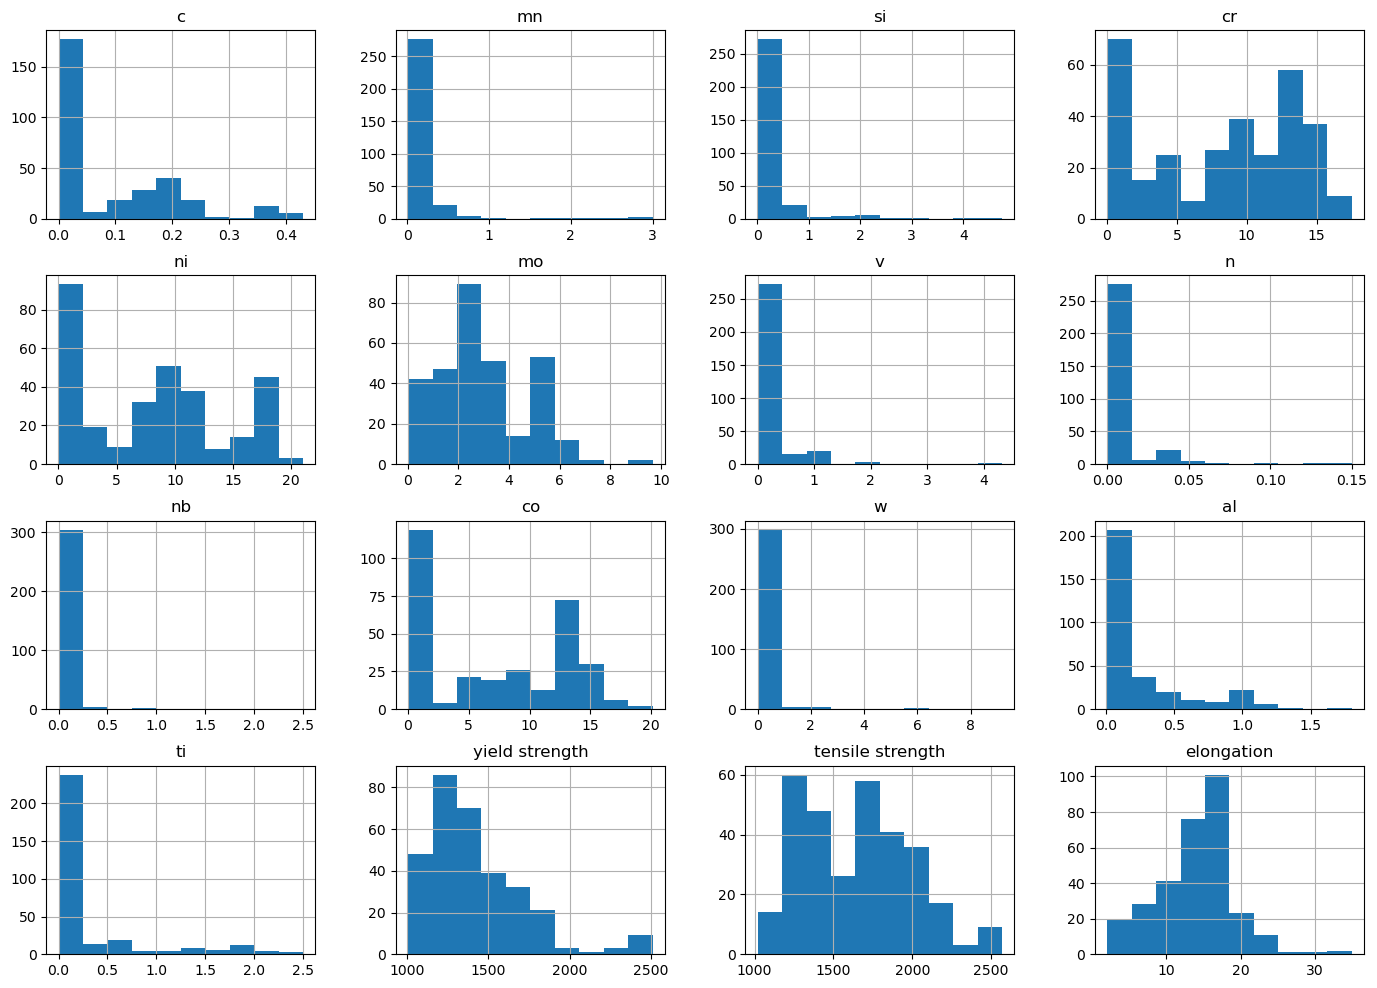

In [4]:
df.hist(figsize = (17,12)) # try to understand how the data is distributed

In [5]:
#Preprocessing 
# define X & Y Values (only look at relevant columns and drop the others)
X = df.drop(columns=["formula", "elongation", "tensile strength", "yield strength"])
y = df['yield strength']

In [6]:
X.head()


c    mn    si     cr     ni    mo     v     n    nb     co     w    al  \
0  0.02  0.05  0.05   0.01  19.70  2.95  0.01  0.00  0.01  15.00  0.00  0.15   
1  0.18  0.01  0.01  13.44   0.01  3.01  0.46  0.04  0.01  19.46  2.35  0.04   
2  0.00  0.01  0.01   8.67  13.45  0.82  0.01  0.00  0.01  13.90  0.00  0.39   
3  0.01  0.05  0.05   0.01  17.70  3.95  0.01  0.00  0.01  15.00  0.00  0.13   
4  0.01  0.05  0.05   0.01  19.40  1.45  0.01  0.00  0.01  14.90  0.00  0.13   

     ti  
0  1.55  
1  0.00  
2  0.57  
3  1.47  
4  1.55

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
test_size=0.2, random_state = 42)

RMSE:  170.3319781112587


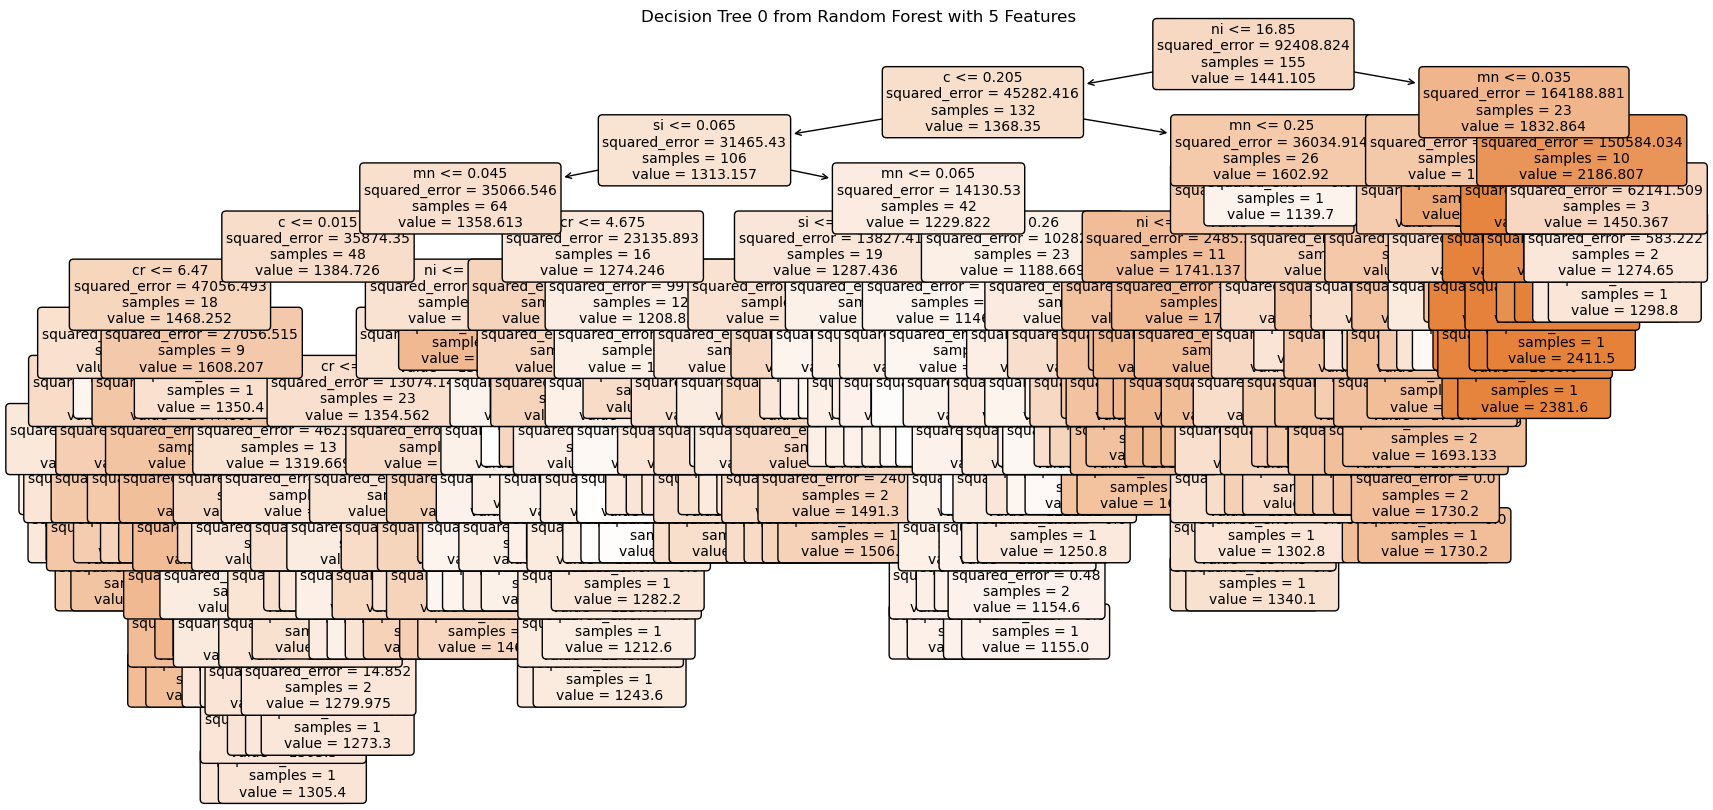

In [ ]:

from sklearn.ensemble import RandomForestRegressor



# Manually select the first 5 columns 
selected_columns = ['c', 'mn', 'si', 'cr', 'ni']  

# Update  X_train and X_test to include only the selected columns
X_train_selected = X_train[selected_columns]
X_test_selected = X_test[selected_columns]

# Now train the model using the selected columns
model = RandomForestRegressor(n_estimators=100, max_depth=100)
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

# Calculate RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)

# visualize a tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the first tree
plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0], 
          feature_names=selected_columns, 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title("Decision Tree 0 from Random Forest with 5 Features")
plt.show()

Selected Columns:  Index(['ti', 'c', 'si', 'mn', 'al'], dtype='object')
RMSE with top 5 features:  153.42562752675414


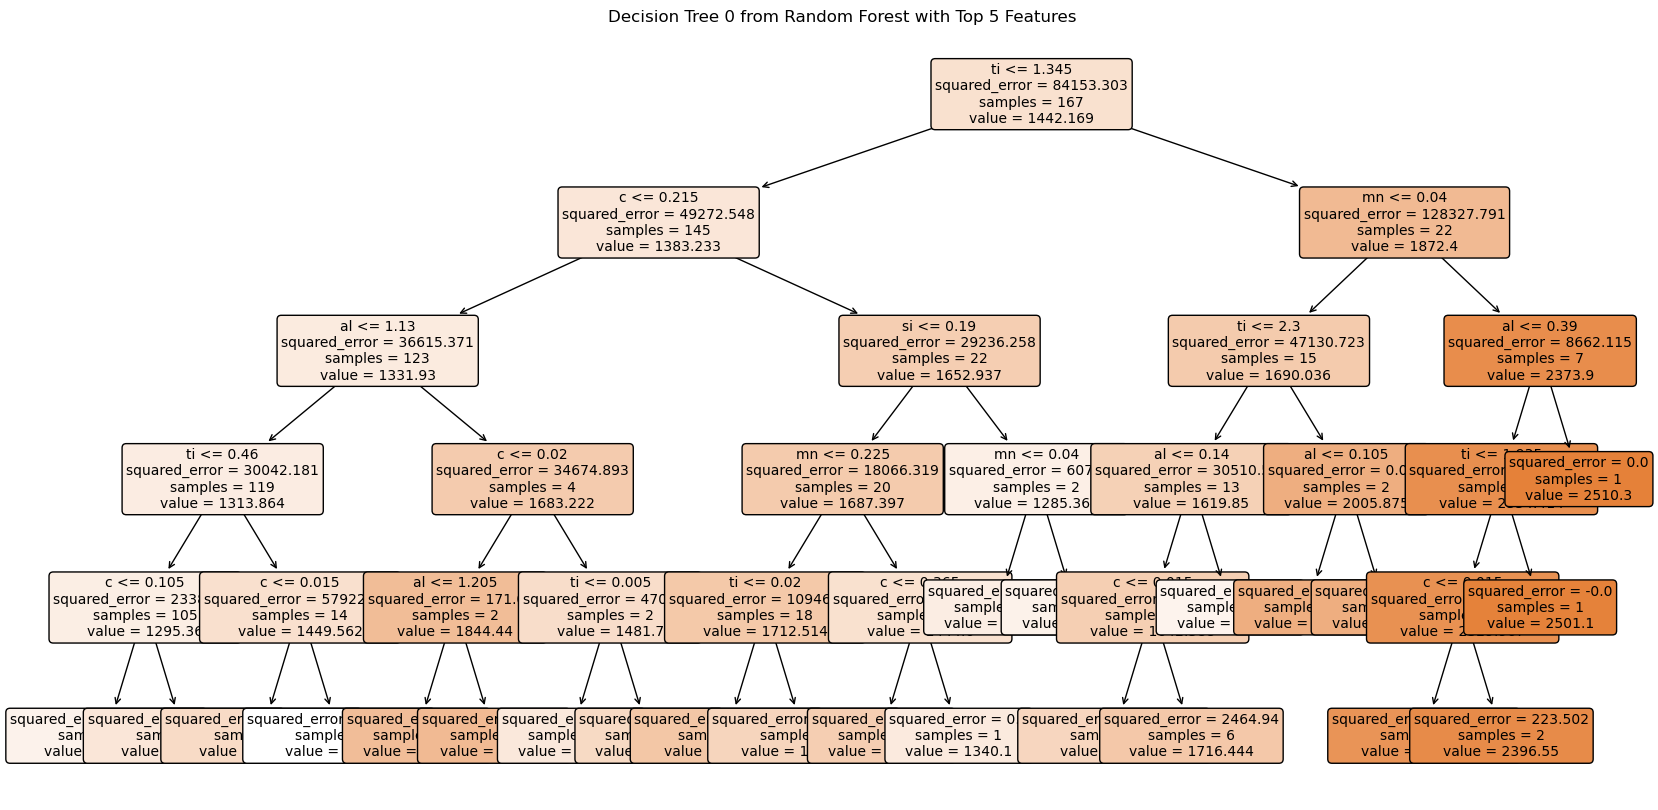

In [ ]:
# Train the model on the full dataset first
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=5, max_depth=5)
model.fit(X_train, y_train)

# Get feature importances from the model
importances = model.feature_importances_

# Get the indices of the top 5 most important features
indices = np.argsort(importances)[::-1][:5]  # Get top 5 feature indices

# Get the column names for the top 5 most important features
selected_columns = X_train.columns[indices]

# Print the selected columns
print("Selected Columns: ", selected_columns)

# Update X_train and X_test to include only the selected columns
X_train_selected = X_train[selected_columns]
X_test_selected = X_test[selected_columns]

# Retrain the model with only the top 5 selected features
model = RandomForestRegressor(n_estimators=5, max_depth=5)
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE with top 5 features: ", rmse)

# visualize a tree
plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0], 
          feature_names=selected_columns, 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title("Decision Tree 0 from Random Forest with Top 5 Features")
plt.show()


In [10]:

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, max_depth=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE: ", rmse)

RMSE:  112.8387140516295


Text(0, 0.5, 'Predicted')

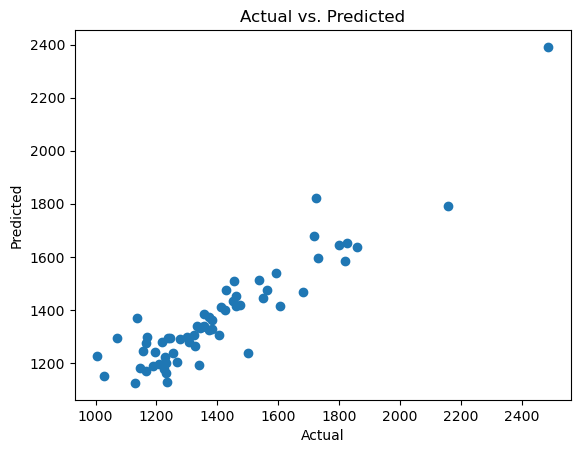

In [11]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.title("Actual vs. Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")

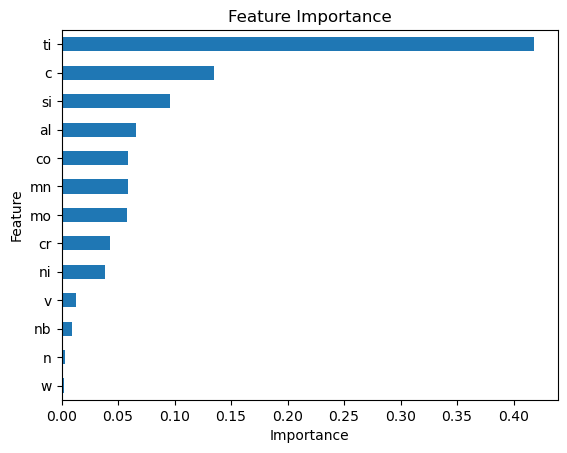

In [12]:

# Get feature names from training data
features = X_train.columns
# Extract importances from model
importances = model.feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances, index=features)
# Plot 10 most important features
feat_imp.sort_values().plot(kind="barh")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

In [13]:
rf_model_full= RandomForestRegressor(n_estimators=100, max_depth=100,
random_state =42)
rf_model_full.fit(X, y)


RandomForestRegressor(max_depth=100, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression

#initiate linear regression model
lin_model = LinearRegression()
#fit regression model
lin_model.fit((y_test.values.reshape(-1, 1)), (y_pred))
#calculate R-squared of regression model
r_squared = lin_model.score((y_test.values.reshape(-1, 1)), (y_pred))
print("R suqared value is: ", r_squared)

R suqared value is:  0.8464107014343986


In [15]:
lin_model_full= LinearRegression()
lin_model_full.fit(X, y)

LinearRegression()

R-squared value is: -0.18867581919612775


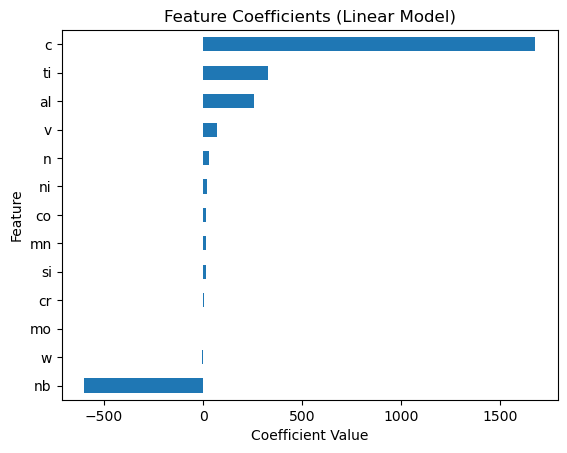

In [16]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

# Initiate linear regression model
lin_model = LinearRegression()

# Fit regression model (assuming X_train and y_train are predefined)
lin_model.fit(X_train, y_train)

# Get the R-squared value of the model
r_squared = lin_model.score(X_test, y_test)
print("R-squared value is:", r_squared)

# Get the coefficients from the linear regression model
coefficients = lin_model.coef_

# Get feature names from the training data
features = X_train.columns

# Create a series with feature names and coefficients
feat_imp = pd.Series(coefficients, index=features)

# Plot the coefficients to visualize feature importance
feat_imp.sort_values().plot(kind="barh")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Coefficients (Linear Model)")
plt.show()

Best alpha found by Grid Search: 0.1
R² for Ridge (Train): 0.5472788553949051, (Test): -0.05764039176517177


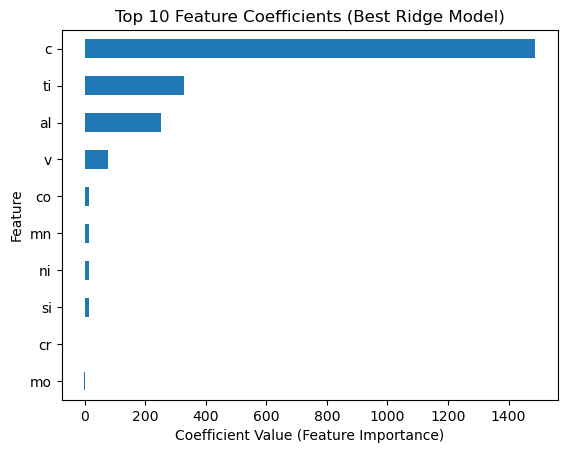

In [17]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd

# Define the parameter grid for alpha (regularization strength)
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10, 100, 1000]}

# Initialize Ridge regression model
ridge_model = Ridge()

# Perform grid search over the specified alpha values
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Store the best model from grid search
best_model_ridge = grid_search.best_estimator_

# Get the best alpha found by GridSearchCV
best_alpha = grid_search.best_params_['alpha']
print("Best alpha found by Grid Search:", best_alpha)

# Calculate R-squared for both training and test data
ridge_train_r2 = best_model_ridge.score(X_train, y_train)
ridge_test_r2 = best_model_ridge.score(X_test, y_test)

print(f"R² for Ridge (Train): {ridge_train_r2}, (Test): {ridge_test_r2}")

# Get the coefficients (which can be interpreted as feature importance)
coefficients = best_model_ridge.coef_

# Get feature names from training data
features = X_train.columns

# Create a series with feature names and coefficients
feat_imp = pd.Series(coefficients, index=features)

# Plot the 10 most important features (based on coefficient values)
feat_imp.nlargest(10).sort_values().plot(kind="barh")
plt.xlabel("Coefficient Value (Feature Importance)")
plt.ylabel("Feature")
plt.title("Top 10 Feature Coefficients (Best Ridge Model)")
plt.show()


Best alpha found by Grid Search: 0.1
R² for Lasso (Train): 0.5485082718879977, (Test): -0.1332895374489611


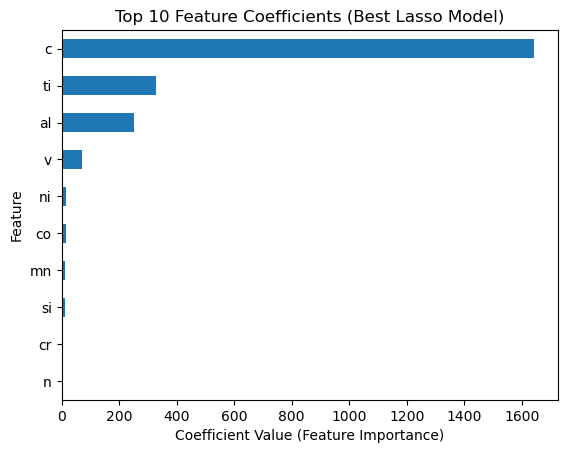

In [18]:
# Lasso
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd

# Define the parameter grid for alpha
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10, 100, 1000]}

# Initialize Lasso regression model
lasso_model = Lasso()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best model and alpha
best_model_lasso = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']
print("Best alpha found by Grid Search:", best_alpha)

# Calculate R-squared for both training and test data
lasso_train_r2 = best_model_lasso.score(X_train, y_train)
lasso_test_r2 = best_model_lasso.score(X_test, y_test)

print(f"R² for Lasso (Train): {lasso_train_r2}, (Test): {lasso_test_r2}")

# Feature importance
coefficients = best_model_lasso.coef_
features = X_train.columns
feat_imp = pd.Series(coefficients, index=features)

# Plot top 10 features
feat_imp.nlargest(10).sort_values().plot(kind="barh")
plt.xlabel("Coefficient Value (Feature Importance)")
plt.ylabel("Feature")
plt.title("Top 10 Feature Coefficients (Best Lasso Model)")
plt.show()

In [19]:
# Compare performance
performance_comparison = pd.DataFrame({
    'Model': ['Ridge', 'Lasso'],
    'Train R²': [ridge_train_r2, lasso_train_r2],
    'Test R²': [ridge_test_r2, lasso_test_r2]
})

print("\nPerformance Comparison:")
print(performance_comparison)


Performance Comparison:
   Model  Train R²  Test R²
0  Ridge  0.547279 -0.05764
1  Lasso  0.548508 -0.13329


In [20]:

# Define the objective function
def obj_fun(X):
    X = [X]
    results = lin_model.predict(X)
    return -results

# Define the boundaries
boundaries = (np.array([[df['c'].min(), df['c'].max()],
                        [df['mn'].min(), df['mn'].max()],
                        [df['si'].min(), df['si'].max()],
                        [df['cr'].min(), df['cr'].max()],
                        [df['ni'].min(), df['ni'].max()],
                        [df['mo'].min(), df['mo'].max()],
                        [df['v'].min(), df['v'].max()],
                        [df['n'].min(), df['n'].max()],
                        [df['nb'].min(), df['nb'].max()],
                        [df['co'].min(), df['co'].max()],
                        [df['w'].min(), df['w'].max()],
                        [df['al'].min(), df['al'].max()],
                        [df['ti'].min(), df['ti'].max()]]))

In [21]:
boundaries = np.array([[df['c'].min(), df['mn'].min(), df['si'].min(), df['cr'].min(), df['ni'].min(), df['mo'].min(), df['v'].min(), df['n'].min(), df['nb'].min(), df['co'].min(), df['w'].min(), df['al'].min(), df['ti'].min()], [df['c'].max(), df['mn'].max(), df['si'].max(), df['cr'].max(), df['ni'].max(), df['mo'].max(), df['v'].max(), df['n'].max(), df['nb'].max(), df['co'].max(), df['w'].max(), df['al'].max(), df['ti'].max()]])


In [22]:
# Define the parameters of the optimization
n_parameters = 13
n_particles = 100
max_iterations = 200
w = 0.5
c1 = 0.8
c2 = 0.9

# Initialize the particles and velocities
particles = np.random.uniform(low=boundaries[0], high=boundaries[1], size=(n_particles, n_parameters))
velocities = np.zeros((n_particles, n_parameters))

# Initialize the best positions and best costs
best_positions = particles.copy()
best_costs = np.array([obj_fun(p) for p in particles])

# Initialize the global best position and global best cost
global_best_position = particles[0].copy()
global_best_cost = best_costs[0]

# Perform the optimization
for i in range(max_iterations):
    # Update the velocities
    r1, r2 = np.random.rand(n_particles, n_parameters), np.random.rand(n_particles, n_parameters)
    cognitive_component = c1 * r1 * (best_positions - particles)
    social_component = c2 * r2 * (global_best_position - particles)
    velocities = w * velocities + cognitive_component + social_component

    # Update the particles
    particles += velocities

    # Enforce the bounds of the search space
    particles = np.clip(particles, boundaries[0], boundaries[1])

    # Evaluate the objective function
    costs = np.array([obj_fun(p) for p in particles])

    # Update the best positions and best costs
    is_best = costs < best_costs
    #best_positions[is_best] = particles[is_best]
    best_positions[is_best[:, 0]] = particles[is_best[:, 0]]


    best_costs[is_best] = costs[is_best]

    # Update the global best position and global best cost
    global_best_index = np.argmin(best_costs)
    global_best_position = best_positions[global_best_index].copy()
    global_best_cost = best_costs[global_best_index]

    # Print the progress
    #print(f'Iteration {i+1}: Best Cost = {global_best_cost:.6f}')
    print(f'Iteration {i+1}: Best Cost = {global_best_cost.item():.6f}')



Iteration 1: Best Cost = -2799.380999
Iteration 2: Best Cost = -3153.045453
Iteration 3: Best Cost = -3351.610804
Iteration 4: Best Cost = -3617.963593
Iteration 5: Best Cost = -3671.086289
Iteration 6: Best Cost = -3750.120812
Iteration 7: Best Cost = -3794.762213
Iteration 8: Best Cost = -3817.877930
Iteration 9: Best Cost = -3841.310496
Iteration 10: Best Cost = -3869.681777
Iteration 11: Best Cost = -3897.523083
Iteration 12: Best Cost = -3904.572521
Iteration 13: Best Cost = -3905.618337
Iteration 14: Best Cost = -3908.609369
Iteration 15: Best Cost = -3911.969035
Iteration 16: Best Cost = -3915.396934
Iteration 17: Best Cost = -3918.268951
Iteration 18: Best Cost = -3920.676514


/srv/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/srv/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/srv/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/srv/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/srv/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/srv/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature n

Iteration 19: Best Cost = -3922.895470
Iteration 20: Best Cost = -3924.764047
Iteration 21: Best Cost = -3925.714526
Iteration 22: Best Cost = -3926.389250
Iteration 23: Best Cost = -3928.022300
Iteration 24: Best Cost = -3929.516427
Iteration 25: Best Cost = -3930.263491
Iteration 26: Best Cost = -3931.313213
Iteration 27: Best Cost = -3932.450479
Iteration 28: Best Cost = -3933.600459
Iteration 29: Best Cost = -3934.802841
Iteration 30: Best Cost = -3936.218685
Iteration 31: Best Cost = -3937.593623
Iteration 32: Best Cost = -3937.618596
Iteration 33: Best Cost = -3937.622839
Iteration 34: Best Cost = -3937.634155
Iteration 35: Best Cost = -3937.649409
Iteration 36: Best Cost = -3937.664893
Iteration 37: Best Cost = -3937.676536


/srv/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/srv/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/srv/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/srv/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/srv/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/srv/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature n

Iteration 38: Best Cost = -3937.688122
Iteration 39: Best Cost = -3937.701083
Iteration 40: Best Cost = -3937.710314
Iteration 41: Best Cost = -3937.721871
Iteration 42: Best Cost = -3937.729859
Iteration 43: Best Cost = -3937.740780
Iteration 44: Best Cost = -3937.749321
Iteration 45: Best Cost = -3937.759357
Iteration 46: Best Cost = -3937.766867
Iteration 47: Best Cost = -3937.775250
Iteration 48: Best Cost = -3937.785578
Iteration 49: Best Cost = -3937.792290
Iteration 50: Best Cost = -3937.800400
Iteration 51: Best Cost = -3937.807268
Iteration 52: Best Cost = -3937.816360
Iteration 53: Best Cost = -3937.822584
Iteration 54: Best Cost = -3937.831394
Iteration 55: Best Cost = -3937.837626
Iteration 56: Best Cost = -3937.843861
Iteration 57: Best Cost = -3937.850211
Iteration 58: Best Cost = -3937.859396
Iteration 59: Best Cost = -3937.864823
Iteration 60: Best Cost = -3937.871456


/srv/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/srv/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/srv/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/srv/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/srv/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/srv/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature n

Iteration 61: Best Cost = -3937.877748
Iteration 62: Best Cost = -3937.882891
Iteration 63: Best Cost = -3937.889568
Iteration 64: Best Cost = -3937.894428
Iteration 65: Best Cost = -3937.900005
Iteration 66: Best Cost = -3937.904519
Iteration 67: Best Cost = -3937.908340
Iteration 68: Best Cost = -3937.912063
Iteration 69: Best Cost = -3937.919026
Iteration 70: Best Cost = -3937.923325
Iteration 71: Best Cost = -3937.927305
Iteration 72: Best Cost = -3937.931069
Iteration 73: Best Cost = -3937.934894
Iteration 74: Best Cost = -3937.939214
Iteration 75: Best Cost = -3937.942972
Iteration 76: Best Cost = -3937.947448
Iteration 77: Best Cost = -3937.950299
Iteration 78: Best Cost = -3937.953485
Iteration 79: Best Cost = -3937.956528
Iteration 80: Best Cost = -3937.959790
Iteration 81: Best Cost = -3937.962236
Iteration 82: Best Cost = -3937.965803
Iteration 83: Best Cost = -3937.967932
Iteration 84: Best Cost = -3937.971459


/srv/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/srv/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/srv/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/srv/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/srv/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/srv/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature n

Iteration 85: Best Cost = -3937.974841
Iteration 86: Best Cost = -3937.978331
Iteration 87: Best Cost = -3937.980444
Iteration 88: Best Cost = -3937.984252
Iteration 89: Best Cost = -3937.987138
Iteration 90: Best Cost = -3937.990050
Iteration 91: Best Cost = -3937.994168
Iteration 92: Best Cost = -3937.996402
Iteration 93: Best Cost = -3937.999561
Iteration 94: Best Cost = -3938.001895
Iteration 95: Best Cost = -3938.004395
Iteration 96: Best Cost = -3938.007094
Iteration 97: Best Cost = -3938.009041
Iteration 98: Best Cost = -3938.012746
Iteration 99: Best Cost = -3938.014825
Iteration 100: Best Cost = -3938.017944
Iteration 101: Best Cost = -3938.021047
Iteration 102: Best Cost = -3938.023081
Iteration 103: Best Cost = -3938.026106
Iteration 104: Best Cost = -3938.028019
Iteration 105: Best Cost = -3938.031533
Iteration 106: Best Cost = -3938.034276


/srv/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/srv/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/srv/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/srv/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/srv/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/srv/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature n

Iteration 107: Best Cost = -3938.035918
Iteration 108: Best Cost = -3938.039318
Iteration 109: Best Cost = -3938.041956
Iteration 110: Best Cost = -3938.044876
Iteration 111: Best Cost = -3938.047148
Iteration 112: Best Cost = -3938.050282
Iteration 113: Best Cost = -3938.054123
Iteration 114: Best Cost = -3938.056973
Iteration 115: Best Cost = -3938.060520
Iteration 116: Best Cost = -3938.062644
Iteration 117: Best Cost = -3938.065474
Iteration 118: Best Cost = -3938.068205
Iteration 119: Best Cost = -3938.070776
Iteration 120: Best Cost = -3938.073113
Iteration 121: Best Cost = -3938.075785
Iteration 122: Best Cost = -3938.077342
Iteration 123: Best Cost = -3938.079657
Iteration 124: Best Cost = -3938.081281
Iteration 125: Best Cost = -3938.082981
Iteration 126: Best Cost = -3938.085266
Iteration 127: Best Cost = -3938.087311
Iteration 128: Best Cost = -3938.089463
Iteration 129: Best Cost = -3938.090760


/srv/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/srv/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/srv/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/srv/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/srv/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/srv/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature n

Iteration 130: Best Cost = -3938.092469
Iteration 131: Best Cost = -3938.093834
Iteration 132: Best Cost = -3938.095083
Iteration 133: Best Cost = -3938.096165
Iteration 134: Best Cost = -3938.097483
Iteration 135: Best Cost = -3938.098867
Iteration 136: Best Cost = -3938.100047
Iteration 137: Best Cost = -3938.101194
Iteration 138: Best Cost = -3938.102490
Iteration 139: Best Cost = -3938.103256
Iteration 140: Best Cost = -3938.104388
Iteration 141: Best Cost = -3938.105446
Iteration 142: Best Cost = -3938.106267
Iteration 143: Best Cost = -3938.107579
Iteration 144: Best Cost = -3938.108389
Iteration 145: Best Cost = -3938.109325
Iteration 146: Best Cost = -3938.110162
Iteration 147: Best Cost = -3938.112162
Iteration 148: Best Cost = -3938.113569
Iteration 149: Best Cost = -3938.114846
Iteration 150: Best Cost = -3938.115964
Iteration 151: Best Cost = -3938.117180


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [23]:

# Print the results
print('Best Position:', global_best_position)
print('Best Cost:', global_best_cost)

Best Position: [ 0.43        3.          4.75        8.54964677 21.          3.38495728
  4.32        0.14978295  0.         20.1         0.          1.8
  2.5       ]
Best Cost: [-3938.18033656]


## Model Selection

In comparison to between Random Forest, Linear, Ridge and Lasso models, we can infer that Random Forest is the most effective when addressing non-linear relationships. When comparing Ridge and Lasso,  they both have a very similar performance value. Reviewing the Test vs. Training of R^2, the training R^2 in lasso and ridge are of the same value (0.55). Having an R^2 of 0.55 tells as that there is 55% variance of the training data which suggests that the underlying relationship between features and target may be complex or that more preprocessing or feature engineering is needed. Both models are low performance since they both have negative R^2 values. The negative test values indicate a poor generalization.  If we had to select between Ridge and Lasso, then Ridge would be preferred only because it is “less negative” than Lasso. 

## Optimization Technique


- Particle Swarm Optimization (PSO)
- Implement Simulated Annealing with the pyheuristics package 
- Explore and apply any other swarm-based algorithms


In [24]:
pip install pyMetaheuristic

  Using cached pyMetaheuristic-1.9.5-py3-none-any.whl (98 kB)
Note: you may need to restart the kernel to use updated packages.


In [25]:
from pyMetaheuristic.algorithm import particle_swarm_optimization

In [26]:
# Ensure that only columns seen by the model are passed
expected_columns = ['c', 'mn', 'si', 'cr', 'ni', 'mo', 'v', 'n', 'nb', 'co', 'w', 'al', 'ti']  # Update with correct features used during model fitting

# Define your custom objective function (as given in your code)
def obj_fun(X):
    # Convert input X to DataFrame to match the feature names used during training
    X_df = pd.DataFrame([X], columns=expected_columns)  # Ensure the feature names match the trained model
    results = lin_model.predict(X_df)  # Predict using the linear model
    return -results[0]  # Return the scalar result

# Define boundaries based on your dataframe df
boundaries = np.array([[df['c'].min(), df['c'].max()],
                       [df['mn'].min(), df['mn'].max()],
                       [df['si'].min(), df['si'].max()],
                       [df['cr'].min(), df['cr'].max()],
                       [df['ni'].min(), df['ni'].max()],
                       [df['mo'].min(), df['mo'].max()],
                       [df['v'].min(), df['v'].max()],
                       [df['n'].min(), df['n'].max()],
                       [df['nb'].min(), df['nb'].max()],
                       [df['co'].min(), df['co'].max()],
                       [df['w'].min(), df['w'].max()],
                       [df['al'].min(), df['al'].max()],
                       [df['ti'].min(), df['ti'].max()]])

# Transpose the boundaries to match the PSO format (tuple of min and max values for each dimension)
boundaries = tuple(map(tuple, np.transpose(boundaries)))

# Update PSO parameters with your custom function and boundaries
parameters = {
    'swarm_size': 250,
    'min_values': boundaries[0],  # Use min values from boundaries
    'max_values': boundaries[1],  # Use max values from boundaries
    'iterations': 100,
    'decay': 0,
    'w': 0.9,
    'c1': 1,
    'c2': 0.5,
    'verbose': True,
    'start_init': None,
    'target_value': None
}

# Run PSO with the custom objective function
pso = particle_swarm_optimization(target_function=obj_fun, **parameters)

# Extract the best optimized variables and minimum value found
variables = pso[:-1]
minimum = pso[-1]

# Print the best optimized values and the minimized value
print('Best Optimized Variables: ', np.around(variables, 4))
print('Minimized Value Found: ', round(minimum, 4))

Iteration =  0  f(x) =  -2948.550583690653
Iteration =  1  f(x) =  -3616.041959106143
Iteration =  2  f(x) =  -3776.665738502095
Iteration =  3  f(x) =  -3857.2284182489875
Iteration =  4  f(x) =  -3913.265282456655
Iteration =  5  f(x) =  -3921.4088680388627
Iteration =  6  f(x) =  -3941.587992919549
Iteration =  7  f(x) =  -3941.587992919549
Iteration =  8  f(x) =  -3945.5219159396947
Iteration =  9  f(x) =  -3960.0329062393566
Iteration =  10  f(x) =  -3971.2317842292023
Iteration =  11  f(x) =  -3971.2317842292023
Iteration =  12  f(x) =  -3971.2317842292023
Iteration =  13  f(x) =  -3971.2317842292023
Iteration =  14  f(x) =  -3971.2317842292023
Iteration =  15  f(x) =  -3971.2317842292023
Iteration =  16  f(x) =  -3971.2317842292023
Iteration =  17  f(x) =  -3971.2317842292023
Iteration =  18  f(x) =  -3971.2317842292023
Iteration =  19  f(x) =  -3971.2317842292023
Iteration =  20  f(x) =  -3971.2317842292023
Iteration =  21  f(x) =  -3971.2317842292023
Iteration =  22  f(x) =  -

In [ ]:
from sklearn.linear_model import Lasso

# Assuming X_train and y_train are defined as DataFrames
best_model_lasso = Lasso().fit(X_train, y_train)  # X_train should be a DataFrame
# Ensure that only columns seen by the model are passed
expected_columns = ['c', 'mn', 'si', 'cr', 'ni', 'mo', 'v', 'n', 'nb', 'co', 'w', 'al', 'ti']  

# Define  custom objective function for Lasso
def obj_fun_lasso(X):
    # Convert input X to DataFrame to match the feature names used during training
    X_df = pd.DataFrame([X], columns=expected_columns)
    results = best_model_lasso.predict(X_df)  # Predict using the Lasso model
    return -results[0]  # Return the scalar result

# Define boundaries based on your dataframe df (same as before)
boundaries = np.array([[df['c'].min(), df['c'].max()],
                       [df['mn'].min(), df['mn'].max()],
                       [df['si'].min(), df['si'].max()],
                       [df['cr'].min(), df['cr'].max()],
                       [df['ni'].min(), df['ni'].max()],
                       [df['mo'].min(), df['mo'].max()],
                       [df['v'].min(), df['v'].max()],
                       [df['n'].min(), df['n'].max()],
                       [df['nb'].min(), df['nb'].max()],
                       [df['co'].min(), df['co'].max()],
                       [df['w'].min(), df['w'].max()],
                       [df['al'].min(), df['al'].max()],
                       [df['ti'].min(), df['ti'].max()]])

# Transpose the boundaries to match the PSO format
boundaries = tuple(map(tuple, np.transpose(boundaries)))

# Update PSO parameters
parameters = {
    'swarm_size': 250,
    'min_values': boundaries[0],
    'max_values': boundaries[1],
    'iterations': 100,
    'decay': 0,
    'w': 0.9,
    'c1': 1,
    'c2': 0.5,
    'verbose': True,
    'start_init': None,
    'target_value': None
}

# Run PSO with the Lasso objective function
pso_lasso = particle_swarm_optimization(target_function=obj_fun_lasso, **parameters)

# Extract and print the best optimized values and minimized value
variables_lasso = pso_lasso[:-1]
minimum_lasso = pso_lasso[-1]

print('Best Optimized Variables (Lasso): ', np.around(variables_lasso, 4))
print('Minimized Value Found (Lasso): ', round(minimum_lasso, 4))



Iteration =  0  f(x) =  -2742.4807877989642
Iteration =  1  f(x) =  -3181.8405037458197
Iteration =  2  f(x) =  -3406.2435803581884
Iteration =  3  f(x) =  -3406.2435803581884
Iteration =  4  f(x) =  -3519.9649508916464
Iteration =  5  f(x) =  -3524.313734062879
Iteration =  6  f(x) =  -3536.8372589410747
Iteration =  7  f(x) =  -3541.411249188128
Iteration =  8  f(x) =  -3545.9745900122334
Iteration =  9  f(x) =  -3560.8045237464885
Iteration =  10  f(x) =  -3574.151464107318
Iteration =  11  f(x) =  -3586.1637104320653
Iteration =  12  f(x) =  -3597.2552436690376
Iteration =  13  f(x) =  -3597.2552436690376
Iteration =  14  f(x) =  -3597.2552436690376
Iteration =  15  f(x) =  -3597.2552436690376
Iteration =  16  f(x) =  -3597.2552436690376
Iteration =  17  f(x) =  -3597.2552436690376
Iteration =  18  f(x) =  -3597.2552436690376
Iteration =  19  f(x) =  -3597.2552436690376
Iteration =  20  f(x) =  -3597.2552436690376
Iteration =  21  f(x) =  -3597.2552436690376
Iteration =  22  f(x) =

In [28]:
from sklearn.linear_model import Ridge
import pandas as pd
import numpy as np

# Assuming X_train and y_train are defined as DataFrames
best_model_ridge = Ridge().fit(X_train, y_train)  # Fit Ridge model
expected_columns = ['c', 'mn', 'si', 'cr', 'ni', 'mo', 'v', 'n', 'nb', 'co', 'w', 'al', 'ti']  # Feature names

# Define your custom objective function for Ridge
def obj_fun_ridge(X):
    # Convert input X to DataFrame to match the feature names used during training
    X_df = pd.DataFrame([X], columns=expected_columns)
    results = best_model_ridge.predict(X_df)  # Predict using the Ridge model
    return -results[0] 

# Define boundaries based on your DataFrame df
boundaries = np.array([[df['c'].min(), df['c'].max()],
                       [df['mn'].min(), df['mn'].max()],
                       [df['si'].min(), df['si'].max()],
                       [df['cr'].min(), df['cr'].max()],
                       [df['ni'].min(), df['ni'].max()],
                       [df['mo'].min(), df['mo'].max()],
                       [df['v'].min(), df['v'].max()],
                       [df['n'].min(), df['n'].max()],
                       [df['nb'].min(), df['nb'].max()],
                       [df['co'].min(), df['co'].max()],
                       [df['w'].min(), df['w'].max()],
                       [df['al'].min(), df['al'].max()],
                       [df['ti'].min(), df['ti'].max()]])

boundaries = tuple(map(tuple, np.transpose(boundaries)))

parameters = {
    'swarm_size': 250,
    'min_values': boundaries[0],
    'max_values': boundaries[1],
    'iterations': 100,
    'decay': 0,
    'w': 0.9,
    'c1': 1,
    'c2': 0.5,
    'verbose': True,
    'start_init': None,
    'target_value': None
}

pso_ridge = particle_swarm_optimization(target_function=obj_fun_ridge, **parameters)

variables_ridge = pso_ridge[:-1]
minimum_ridge = pso_ridge[-1]

print('Best Optimized Variables (Ridge): ', np.around(variables_ridge, 4))
print('Minimized Value Found (Ridge): ', round(minimum_ridge, 4))



Iteration =  0  f(x) =  -2781.80997420743
Iteration =  1  f(x) =  -3041.0868034480254
Iteration =  2  f(x) =  -3041.0868034480254
Iteration =  3  f(x) =  -3041.0868034480254
Iteration =  4  f(x) =  -3309.92645828359
Iteration =  5  f(x) =  -3431.4178879858514
Iteration =  6  f(x) =  -3464.5130297585765
Iteration =  7  f(x) =  -3485.752434114698
Iteration =  8  f(x) =  -3493.149581234945
Iteration =  9  f(x) =  -3493.149581234945
Iteration =  10  f(x) =  -3493.149581234945
Iteration =  11  f(x) =  -3493.149581234945
Iteration =  12  f(x) =  -3493.149581234945
Iteration =  13  f(x) =  -3493.149581234945
Iteration =  14  f(x) =  -3493.149581234945
Iteration =  15  f(x) =  -3493.149581234945
Iteration =  16  f(x) =  -3493.149581234945
Iteration =  17  f(x) =  -3493.149581234945
Iteration =  18  f(x) =  -3493.149581234945
Iteration =  19  f(x) =  -3493.149581234945
Iteration =  20  f(x) =  -3493.149581234945
Iteration =  21  f(x) =  -3493.149581234945
Iteration =  22  f(x) =  -3493.14958123

In [29]:
import numpy as np
import pandas as pd
from scipy.optimize import dual_annealing
from sklearn.linear_model import Ridge, Lasso, LinearRegression

# Assuming you have your dataframe df and have defined your expected_columns
expected_columns = ['c', 'mn', 'si', 'cr', 'ni', 'mo', 'v', 'n', 'nb', 'co', 'w', 'al', 'ti']

# Fit the models
ridge_model = Ridge().fit(X_train, y_train)
lasso_model = Lasso().fit(X_train, y_train)
linear_model = LinearRegression().fit(X_train, y_train)

# Define the objective function for Ridge
def obj_fun_dual_annealing_ridge(X):
    X_df = pd.DataFrame([X], columns=expected_columns)
    results = ridge_model.predict(X_df)
    return -results[0]  # Return negative to maximize

# Define the objective function for Lasso
def obj_fun_dual_annealing_lasso(X):
    X_df = pd.DataFrame([X], columns=expected_columns)
    results = lasso_model.predict(X_df)
    return -results[0]  

# Define the objective function for Linear
def obj_fun_dual_annealing_linear(X):
    X_df = pd.DataFrame([X], columns=expected_columns)
    results = linear_model.predict(X_df)
    return -results[0]  # Return negative to maximize

# Define boundaries based on your dataframe df
boundaries = np.array([[df[col].min(), df[col].max()] for col in expected_columns])
bounds = list(zip(boundaries[:, 0], boundaries[:, 1]))

# Run dual annealing for Ridge
result_ridge = dual_annealing(obj_fun_dual_annealing_ridge, bounds)
optimal_variables_ridge = result_ridge.x
minimized_value_ridge = -result_ridge.fun  

# Run dual annealing for Lasso
result_lasso = dual_annealing(obj_fun_dual_annealing_lasso, bounds)
optimal_variables_lasso = result_lasso.x
minimized_value_lasso = -result_lasso.fun  

# Run dual annealing for Linear
result_linear = dual_annealing(obj_fun_dual_annealing_linear, bounds)
optimal_variables_linear = result_linear.x
minimized_value_linear = -result_linear.fun  

# Print results
print('Best Optimized Variables (Ridge): ', np.around(optimal_variables_ridge, 4))
print('Minimized Value Found (Ridge): ', round(minimized_value_ridge, 4))

print('Best Optimized Variables (Lasso): ', np.around(optimal_variables_lasso, 4))
print('Minimized Value Found (Lasso): ', round(minimized_value_lasso, 4))

print('Best Optimized Variables (Linear): ', np.around(optimal_variables_linear, 4))
print('Minimized Value Found (Linear): ', round(minimized_value_linear, 4))


Best Optimized Variables (Ridge):  [4.30e-01 3.00e+00 4.75e+00 1.00e-02 1.00e-02 2.00e-02 4.32e+00 0.00e+00
 0.00e+00 2.01e+01 0.00e+00 1.80e+00 2.50e+00]
Minimized Value Found (Ridge):  3493.1496
Best Optimized Variables (Lasso):  [4.300e-01 3.000e+00 4.750e+00 8.029e-01 2.100e+01 2.000e-02 4.320e+00
 2.610e-02 0.000e+00 2.010e+01 0.000e+00 1.800e+00 2.500e+00]
Minimized Value Found (Lasso):  3597.2552
Best Optimized Variables (Linear):  [4.30e-01 3.00e+00 4.75e+00 1.75e+01 2.10e+01 2.00e-02 4.32e+00 1.50e-01
 0.00e+00 2.01e+01 0.00e+00 1.80e+00 2.50e+00]
Minimized Value Found (Linear):  3979.4641


In [30]:
#GWO

expected_columns = ['c', 'mn', 'si', 'cr', 'ni', 'mo', 'v', 'n', 'nb', 'co', 'w', 'al', 'ti']  # Update with correct features used during model fitting

def obj_fun(X):
    X_df = pd.DataFrame([X], columns=expected_columns)  # Ensure the feature names match the trained model
    results = lin_model.predict(X_df)  # Predict using the linear model
    return -results[0]  # Return the scalar result

boundaries = np.array([[df['c'].min(), df['c'].max()],
                       [df['mn'].min(), df['mn'].max()],
                       [df['si'].min(), df['si'].max()],
                       [df['cr'].min(), df['cr'].max()],
                       [df['ni'].min(), df['ni'].max()],
                       [df['mo'].min(), df['mo'].max()],
                       [df['v'].min(), df['v'].max()],
                       [df['n'].min(), df['n'].max()],
                       [df['nb'].min(), df['nb'].max()],
                       [df['co'].min(), df['co'].max()],
                       [df['w'].min(), df['w'].max()],
                       [df['al'].min(), df['al'].max()],
                       [df['ti'].min(), df['ti'].max()]])

boundaries = tuple(map(tuple, np.transpose(boundaries)))

# iGWO - Parameters
parameters = {
    'pack_size': 25,       # Number of wolves in the pack
    'min_values': boundaries[0], # Minimum search bounds
    'max_values': boundaries[1], # Maximum search bounds
    'iterations': 1000,    # Number of iterations
    'verbose': True,       # Print progress during optimization
    'start_init': None,    # No predefined start
    'target_value': None   # No specific target value
}

from pyMetaheuristic.algorithm import improved_grey_wolf_optimizer

igwo = improved_grey_wolf_optimizer(target_function=obj_fun, **parameters)

variables = igwo[:-1]
minimum = igwo[-1]

# Print the best optimized values and the minimized value
print('Best Optimized Variables: ', np.around(variables, 4))
print('Minimized Value Found: ', round(minimum, 4))

Iteration =  0  f(x) =  -813.9563467465404
Iteration =  1  f(x) =  -2662.1901968762913
Iteration =  2  f(x) =  -3641.757115254535
Iteration =  3  f(x) =  -3712.3022772131276
Iteration =  4  f(x) =  -3716.9513877536638
Iteration =  5  f(x) =  -3735.6986378416946
Iteration =  6  f(x) =  -3818.066471776832
Iteration =  7  f(x) =  -3857.959360376587
Iteration =  8  f(x) =  -3885.4813753917847
Iteration =  9  f(x) =  -3922.4490884712354
Iteration =  10  f(x) =  -3922.4490884712354
Iteration =  11  f(x) =  -3922.5593801896293
Iteration =  12  f(x) =  -3922.5593801896293
Iteration =  13  f(x) =  -3926.9336499593546
Iteration =  14  f(x) =  -3926.9336499593546
Iteration =  15  f(x) =  -3929.3714576871316
Iteration =  16  f(x) =  -3929.3714576871316
Iteration =  17  f(x) =  -3929.3714576871316
Iteration =  18  f(x) =  -3929.3714576871316
Iteration =  19  f(x) =  -3932.559868232493
Iteration =  20  f(x) =  -3935.101556124808
Iteration =  21  f(x) =  -3935.127175843208
Iteration =  22  f(x) =  -3

In [31]:

lasso_model = Lasso().fit(X_train, y_train)
ridge_model = Ridge().fit(X_train, y_train)

def obj_fun_lasso(X):
    X_df = pd.DataFrame([X], columns=expected_columns)
    results = lasso_model.predict(X_df)
    return -results[0]  # Return negative to maximize

def obj_fun_ridge(X):
    X_df = pd.DataFrame([X], columns=expected_columns)
    results = ridge_model.predict(X_df)
    return -results[0]  # Return negative to maximize

boundaries = np.array([[df[col].min(), df[col].max()] for col in expected_columns])
boundaries = tuple(map(tuple, np.transpose(boundaries)))

# iGWO - Parameters
parameters = {
    'pack_size': 25,       # Number of wolves in the pack
    'min_values': boundaries[0], # Minimum search bounds
    'max_values': boundaries[1], # Maximum search bounds
    'iterations': 1000,    # Number of iterations
    'verbose': True,       # Print progress during optimization
    'start_init': None,    # No predefined start
    'target_value': None   # No specific target value
}

# Run the Improved Grey Wolf Optimizer for Lasso
igwo_lasso = improved_grey_wolf_optimizer(target_function=obj_fun_lasso, **parameters)

# Extract the best optimized variables and minimum value found for Lasso
variables_lasso = igwo_lasso[:-1]
minimum_lasso = igwo_lasso[-1]

# Print the best optimized values and minimized value for Lasso
print('Best Optimized Variables (Lasso): ', np.around(variables_lasso, 4))
print('Minimized Value Found (Lasso): ', round(minimum_lasso, 4))

igwo_ridge = improved_grey_wolf_optimizer(target_function=obj_fun_ridge, **parameters)

# Extract the best optimized variables and minimum value found for Ridge
variables_ridge = igwo_ridge[:-1]
minimum_ridge = igwo_ridge[-1]

# Print the best optimized values and minimized value for Ridge
print('Best Optimized Variables (Ridge): ', np.around(variables_ridge, 4))
print('Minimized Value Found (Ridge): ', round(minimum_ridge, 4))


Iteration =  0  f(x) =  -940.8797122001217
Iteration =  1  f(x) =  -2736.0439391025584
Iteration =  2  f(x) =  -3138.190828927307
Iteration =  3  f(x) =  -3354.40555590614
Iteration =  4  f(x) =  -3500.1476508159067
Iteration =  5  f(x) =  -3534.081112389329
Iteration =  6  f(x) =  -3589.6225122330943
Iteration =  7  f(x) =  -3589.6225122330943
Iteration =  8  f(x) =  -3589.6225122330943
Iteration =  9  f(x) =  -3589.6225122330943
Iteration =  10  f(x) =  -3590.993402729585
Iteration =  11  f(x) =  -3594.0880370538544
Iteration =  12  f(x) =  -3597.2512311421715
Iteration =  13  f(x) =  -3597.2552436690376
Iteration =  14  f(x) =  -3597.2552436690376
Iteration =  15  f(x) =  -3597.2552436690376
Iteration =  16  f(x) =  -3597.2552436690376
Iteration =  17  f(x) =  -3597.2552436690376
Iteration =  18  f(x) =  -3597.2552436690376
Iteration =  19  f(x) =  -3597.2552436690376
Iteration =  20  f(x) =  -3597.2552436690376
Iteration =  21  f(x) =  -3597.2552436690376
Iteration =  22  f(x) =  -

In [32]:

# Print the best optimized values and minimized value for Lasso
print('Best Optimized Variables (Lasso): ', np.around(variables_lasso, 4))
print('Minimized Value Found (Lasso): ', round(minimum_lasso, 4))

# Print the best optimized values and minimized value for Ridge
print('Best Optimized Variables (Ridge): ', np.around(variables_ridge, 4))
print('Minimized Value Found (Ridge): ', round(minimum_ridge, 4))

Best Optimized Variables (Lasso):  [4.3000e-01 3.0000e+00 4.7500e+00 8.0217e+00 2.1000e+01 2.0000e-02
 4.3200e+00 5.8200e-02 0.0000e+00 2.0100e+01 0.0000e+00 1.8000e+00
 2.5000e+00]
Minimized Value Found (Lasso):  -3597.2552
Best Optimized Variables (Ridge):  [4.30e-01 3.00e+00 4.75e+00 1.00e-02 1.00e-02 2.00e-02 4.32e+00 0.00e+00
 0.00e+00 2.01e+01 0.00e+00 1.80e+00 2.50e+00]
Minimized Value Found (Ridge):  -3493.1496


## Analysis and Reporting


- Report of the optimal values obtained from each optimization method.
- Compare the performance of each algorithm.

PSO LINEAR: 

Best Optimized Variables:  [4.30e-01 3.00e+00 4.75e+00 1.75e+01 2.10e+01 2.00e-02 4.32e+00 1.50e-01
 0.00e+00 2.01e+01 0.00e+00 1.80e+00 2.50e+00]

Minimized Value Found:  -3979.4641

PSO LASSO:

Best Optimized Variables (Lasso):  [4.30e-01 3.00e+00 4.75e+00 1.75e+01 2.10e+01 2.00e-02 4.32e+00 1.50e-01
 0.00e+00 2.01e+01 0.00e+00 1.80e+00 2.50e+00]
Minimized Value Found (Lasso):  -3597.2552

PSO RIDGE: 

Best Optimized Variables (Ridge):  [4.30e-01 3.00e+00 4.75e+00 1.00e-02 1.00e-02 2.00e-02 4.32e+00 0.00e+00
 0.00e+00 2.01e+01 0.00e+00 1.80e+00 2.50e+00]
Minimized Value Found (Ridge):  -3493.1496

SIMULATION ANNEALING: 

Best Optimized Variables (Ridge):  [4.30e-01 3.00e+00 4.75e+00 1.00e-02 1.00e-02 2.00e-02 4.32e+00 0.00e+00
 0.00e+00 2.01e+01 0.00e+00 1.80e+00 2.50e+00]
Minimized Value Found (Ridge):  3493.1496

Best Optimized Variables (Lasso):  [4.300e-01 3.000e+00 4.750e+00 1.445e+00 2.100e+01 2.000e-02 4.320e+00
 1.073e-01 0.000e+00 2.010e+01 0.000e+00 1.800e+00 2.500e+00]
Minimized Value Found (Lasso):  3597.2552

Best Optimized Variables (Linear):  [4.30e-01 3.00e+00 4.75e+00 1.75e+01 2.10e+01 2.00e-02 4.32e+00 1.50e-01
 0.00e+00 2.01e+01 0.00e+00 1.80e+00 2.50e+00]
Minimized Value Found (Linear):  3979.4641


GWO:

Best Optimized Variables (Linear):  [4.30e-01 3.00e+00 4.75e+00 1.75e+01 2.10e+01 2.00e-02 4.32e+00 0.00e+00
 0.00e+00 2.01e+01 0.00e+00 1.80e+00 2.50e+00]
Minimized Value Found:  -3975.1261

Best Optimized Variables (Ridge):  [4.30e-01 3.00e+00 4.75e+00 1.00e-02 1.00e-02 2.00e-02 4.32e+00 0.00e+00
 0.00e+00 2.01e+01 0.00e+00 1.80e+00 2.50e+00]
Minimized Value Found (Ridge):  -3493.1496

Best Optimized Variables (Lasso):  [4.30000e-01 3.00000e+00 4.75000e+00 1.31334e+01 2.10000e+01 2.00000e-02
 4.32000e+00 2.92000e-02 0.00000e+00 2.01000e+01 0.00000e+00 1.80000e+00
 2.50000e+00]
Minimized Value Found (Lasso):  -3597.2552


After computing via optimization method for the surrogate models,  Ridge regression can be seen as the most suitable model in terms of its minimized value. It also effectively carries out feature selection by zeroing out irrelevant features and it also demonstrated a training accuracy of 0.55. Lasso regression also holds the best predictive performance of the other comparable models. However, all points of comparison are only slight differences. 

Interestingly, the minimized values for both Lasso and Linear regression indicate that these models may be exploring similar regions within the parameter space effectively.

The Lasso regression model has a higher minimized value than Ridge but lower than Linear regression. The Linear regression model had the highest minimized value, indicating it may not capture the relationships in the data as effectively as Ridge and Lasso.To prevent overfitting,  we should look into more complex models and/or consider additional tuning of hyper parameters for Ridge and Lasso.

